In [40]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
file_paths = ['szn_folders/play_by_play_2021.csv', 'szn_folders/play_by_play_2022.csv', 'szn_folders/play_by_play_2023.csv']

dfs = []

for file_path in file_paths:
    df = pd.read_csv(file_path, low_memory=False)
    dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)

print(combined_df)

        play_id          game_id  old_game_id home_team away_team season_type  \
0             1  2021_01_ARI_TEN   2021091207       TEN       ARI         REG   
1            40  2021_01_ARI_TEN   2021091207       TEN       ARI         REG   
2            55  2021_01_ARI_TEN   2021091207       TEN       ARI         REG   
3            76  2021_01_ARI_TEN   2021091207       TEN       ARI         REG   
4           100  2021_01_ARI_TEN   2021091207       TEN       ARI         REG   
...         ...              ...          ...       ...       ...         ...   
149017     4791    2023_22_SF_KC   2024021100        KC        SF        POST   
149018     4813    2023_22_SF_KC   2024021100        KC        SF        POST   
149019     4835    2023_22_SF_KC   2024021100        KC        SF        POST   
149020     4860    2023_22_SF_KC   2024021100        KC        SF        POST   
149021     4881    2023_22_SF_KC   2024021100        KC        SF        POST   

        week posteam postea

In [27]:
combined_df.head()

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
0,1,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,NaN,NaN,NaN,...,0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,-1.399805,NaN,NaN,NaN,NaN,NaN,0.491433,-49.143299
3,76,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,0.032412,1.165133,5.803177,4.0,0.896654,0.125098,0.697346,30.265415
4,100,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,-1.532898,0.256036,4.147637,2.0,0.965009,0.965009,0.978253,2.174652


In [38]:
# Group QB statistics

qb_feats = ['season','passer_id','passer','pass','complete_pass','interception','sack','yards_gained','touchdown']

# Group by season and who the passer was
grouby_feats = ['season', 'passer_id','passer']

# Group by and aggregate by sum
qb_df = (combined_df
         .loc[:, qb_feats]
         .groupby(grouby_feats, as_index=False)
         .sum())

qb_df.sample(10)

,season,passer_id,passer,pass,complete_pass,interception,sack,yards_gained,touchdown
1,2021,00-0022824,A.Lee,1,0.0,0.0,0.0,0.0,0.0
218,2022,00-0036442,J.Burrow,854,486.0,14.0,51.0,5146.0,42.0
312,2023,00-0036259,J.Jennings,1,1.0,0.0,0.0,21.0,1.0
329,2023,00-0036963,St. Brown,1,0.0,0.0,1.0,-8.0,0.0
11,2021,00-0026498,M.Stafford,830,502.0,20.0,37.0,5887.0,54.0
296,2023,00-0034955,B.Rypien,46,18.0,1.0,2.0,173.0,0.0
331,2023,00-0036972,M.Jones,394,224.0,12.0,22.0,2078.0,14.0
6,2021,00-0026035,D.Amendola,1,0.0,0.0,0.0,0.0,0.0
91,2021,00-0035156,J.Fox,3,2.0,0.0,0.0,38.0,0.0
244,2023,00-0027948,B.Gabbert,41,18.0,3.0,1.0,223.0,0.0


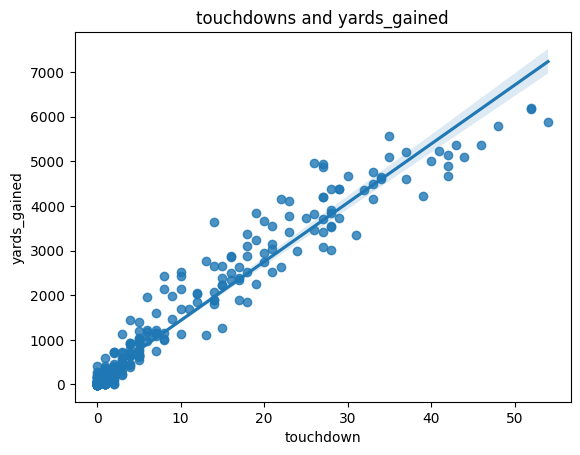

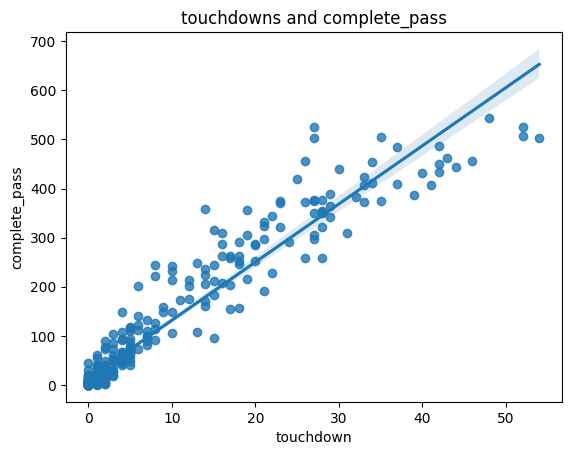

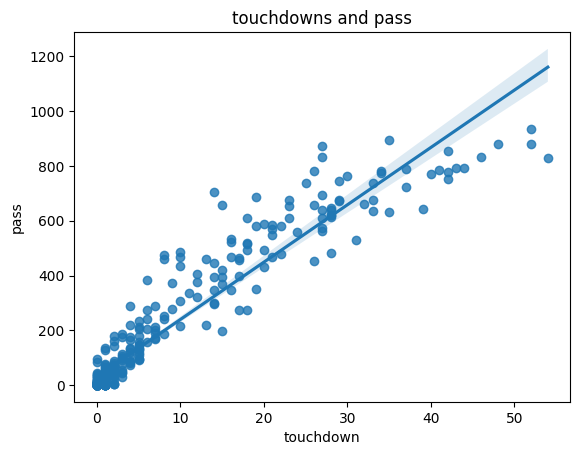

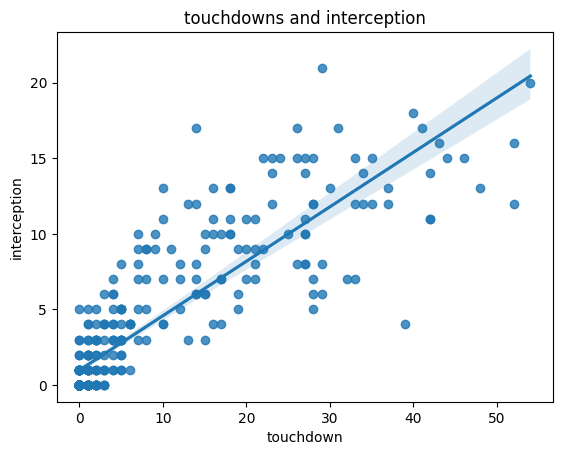

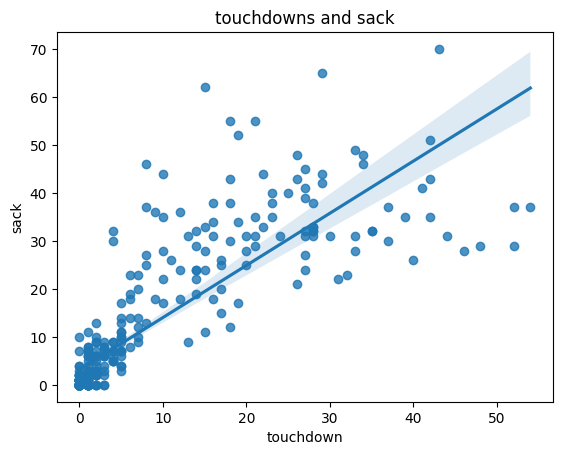

In [41]:
# What correaltes with touchdowns??
for y in ['yards_gained','complete_pass','pass','interception','sack']:
    sns.regplot(data=qb_df, x='touchdown', y=y)
    plt.title(f'touchdowns and {y}')
    plt.show()

In [44]:
# Will a previous season's data predict next season's stats?
# Create a df that adds current season's data with previous season's data
_df = qb_df.copy()

_df['season'] = _df['season'].add(1)

new_qb_df = (qb_df
             .merge(_df,
                    on=['season','passer_id','passer'],
                    suffixes=('','_prev'),
                    how = 'left'))

new_qb_df.sample(10)

,season,passer_id,passer,pass,complete_pass,interception,sack,yards_gained,touchdown,pass_prev,complete_pass_prev,interception_prev,sack_prev,yards_gained_prev,touchdown_prev
299,2023,00-0035228,K.Murray,322,176.0,5.0,18.0,1843.0,12.0,465.0,259.0,7.0,25.0,2389.0,17.0
257,2023,00-0031288,A.McCarron,7,4.0,0.0,1.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
186,2022,00-0034577,K.Allen,89,46.0,4.0,5.0,384.0,4.0,22.0,12.0,0.0,2.0,115.0,1.0
240,2023,00-0026158,J.Flacco,276,157.0,10.0,12.0,1839.0,18.0,212.0,110.0,3.0,10.0,992.0,5.0
281,2023,00-0033936,C.Beathard,68,40.0,0.0,6.0,360.0,1.0,12.0,7.0,1.0,1.0,30.0,0.0
213,2022,00-0036326,C.Claypool,1,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
322,2023,00-0036849,T.Atwell,1,0.0,0.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
220,2022,00-0036893,N.Harris,1,1.0,0.0,0.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
83,2021,00-0034855,B.Mayfield,514,253.0,13.0,43.0,2876.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
162,2022,00-0033009,T.Boyd,2,1.0,0.0,1.0,11.0,0.0,1.0,1.0,0.0,0.0,46.0,0.0


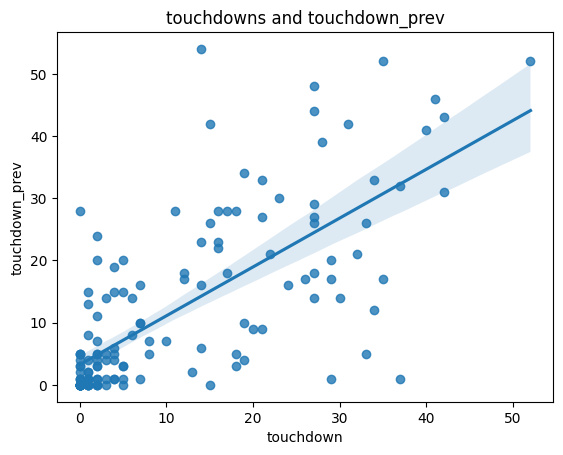

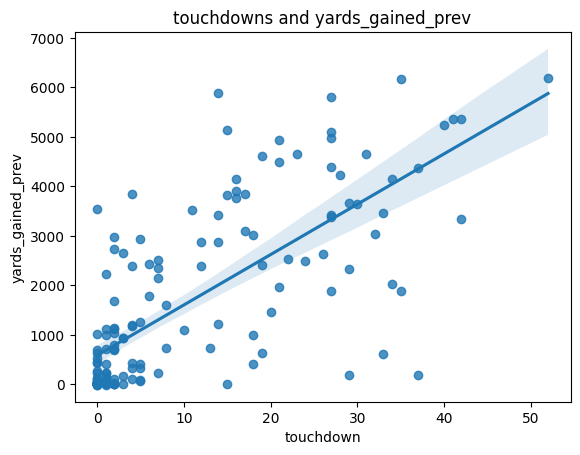

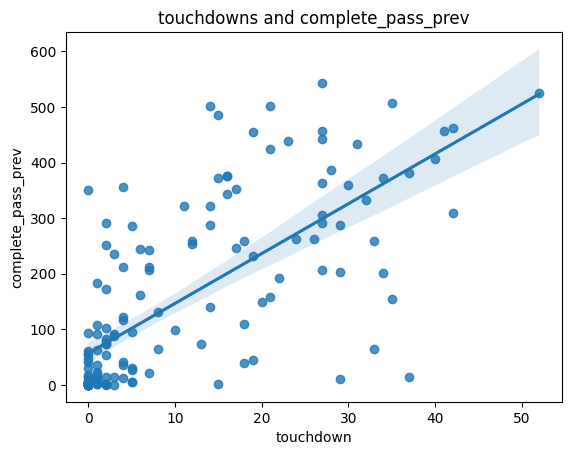

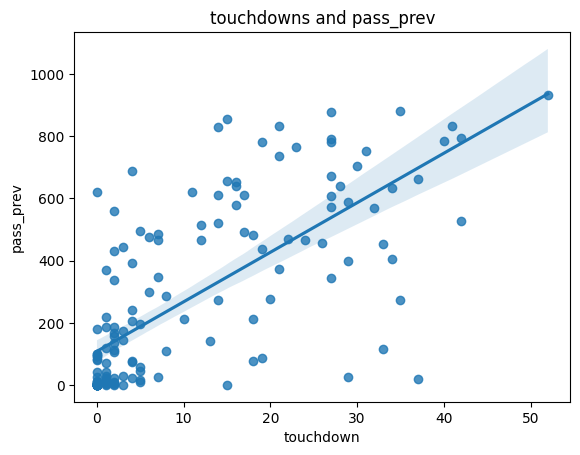

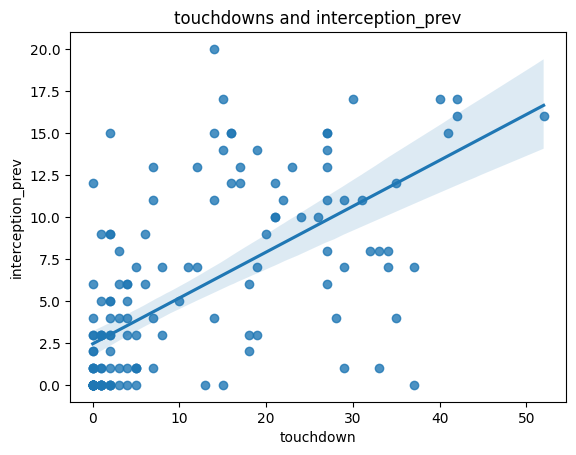

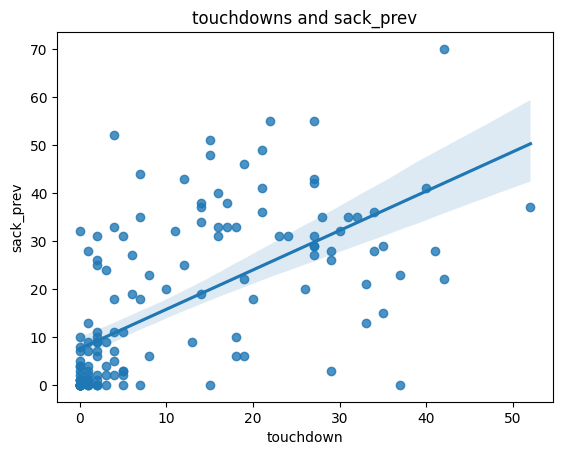

In [61]:
# Graph current season vs. previous season
for y in ['touchdown_prev','yards_gained_prev','complete_pass_prev','pass_prev','interception_prev', 'sack_prev']:
    sns.regplot(data=new_qb_df, x='touchdown', y=y)
    plt.title(f'touchdowns and {y}')
    plt.show()

In [62]:
# Apply machine learning
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

In [70]:
# We will 'train' our data on one season and 'test' on the next season.
features = ['pass_prev', 'complete_pass_prev', 
            'interception_prev', 'sack_prev',
            'yards_gained_prev', 'touchdown_prev']

# We are predicting "current" season touchdowns 
target = 'touchdown' 

# Let's make a subset of data that has 
# no null values
model_data = (new_qb_df
              .dropna(subset=features+[target]))

# train on 2020 data  
train_data = (model_data
              .loc[model_data['season']==2022])

# test on 2021 data (data the model hasn't seen)
test_data = (model_data
             .loc[model_data['season']==2023])

# initialize the linear regression
model = LinearRegression()

# fit, or "train", the model on the training data
model.fit(train_data.loc[:, features], 
          train_data[target])

preds = model.predict(test_data.loc[:, features])
preds = pd.Series(preds, index=test_data.index)

test_data['preds'] = preds

C:\Users\annap\AppData\Local\Temp\ipykernel_9980\752555182.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['preds'] = preds


In [71]:
rmse = mean_squared_error(test_data['touchdown'], test_data['preds'])**0.5
r2 = pearsonr(test_data['touchdown'], test_data['preds'])[0]**2
print(f'rmse: {rmse}\nr2: {r2}')

rmse: 11.033586201462972
r2: 0.3127821203339658


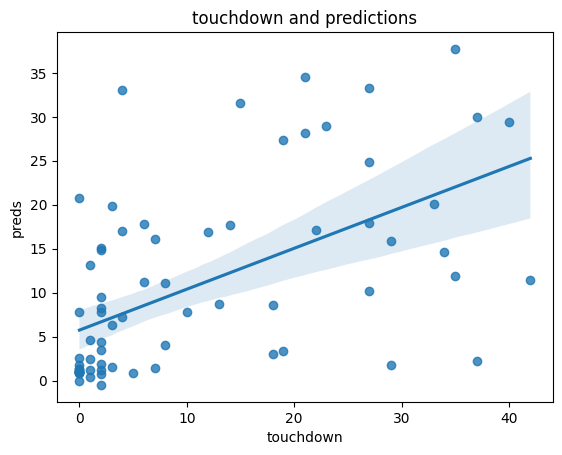

In [72]:
sns.regplot(data=test_data, x='touchdown', y='preds')
plt.title('touchdown and predictions')
plt.show()

In [75]:
test_data.loc[:, ['season','passer_id','passer','touchdown','preds']]

,season,passer_id,passer,touchdown,preds
239,2023,00-0023459,A.Rodgers,0.0,20.740518
240,2023,00-0026158,J.Flacco,18.0,8.604860
241,2023,00-0026498,M.Stafford,27.0,10.148475
242,2023,00-0026625,B.Hoyer,1.0,1.181396
244,2023,00-0027948,B.Gabbert,0.0,1.010245
...,...,...,...,...,...
338,2023,00-0037834,B.Purdy,35.0,11.951996
339,2023,00-0038102,K.Pickett,6.0,17.863162
340,2023,00-0038108,B.Zappe,8.0,4.047268
342,2023,00-0038122,D.Ridder,13.0,8.733812
